<a href="https://colab.research.google.com/github/CarlosBustos97/curso_computacion_cuantica/blob/patch-2/Proyecto_final/Carlos_Andres_Bustos_Hurtatiz/Carlos_Andres_Bustos_Hurtatiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
__authors__   = "Carlos Aandrés Bustos Hurtatiz"
__code__      = "20212678037"
__reference__ = "Uso del algoritmo de Bernstein-Vazirani para atacar cifrados de bloque"

# Introducción

En los últimos años, ha habido un interés creciente en la criptografía cuántica. Por un lado, se han propuesto muchos esquemas cristalográficos basados en información cuántica, entre los cuales el resultado más conocido es la distribución de clave cuántica (OKD). Estos esquemas aprovechan al máximo las propiedades novedosas de la información cuántica y tienen como objetivo realizar funcionalidades que no existen utilizando solo la información clásica. Por otro lado, el desarrollo de la computación cuántica amenaza a muchos criptosistemas clásicos. 

El ejemplo más representativo es el algoritmo de Shor. Al usar el algoritmo de Shor, un adversario que posee una computadora cuántica puede romper la seguridad de cualquier esquema basado en factorización o logaritmo discreto, como RSA. Si bien la criptografía de clave pública utilizada actualmente sufre una grave amenaza debido al algoritmo de Shor, el impacto de las computadoras cuánticas en la criptografía de clave simétrica aún se comprende menos. Dado que el algoritmo de Grover proporciona una aceleración cuadrática para problemas generales de búsqueda, las longitudes de clave de los criptosistemas de clave simétrica deben duplicarse para mantener la seguridad.

Además, el algoritmo de Simon también se ha aplicado al criptoanálisis. usa el algoritmo de Simon para atacar varios criptosistemas simétricos, como CBC-MAC, PMAC, CLOC, etc. También estudian cómo se comporta el criptoanálisis diferencial y lineal en el mundo poscuántico. Además del algoritmo de Simon, el algoritmo de Bernstein-Vazirani también se ha utilizado para el criptoanálisis. Li y Yang propusieron dos métodos para ejecutar el criptoanálisis diferencial cuántico basado en el algoritmo BV, pero en su ataque se supone implícitamente que el atacante puede consultar la función que asigna el texto sin formato a la entrada de la última ronda de cifrado.

## Algoritmo de Bernstein–Vazirani


El algoritmo de  Bernstein–Vazirani permite conocer un string s binario, consiste en una cadena de caracteres formada por unos y ceros que está contenida dentro de una función, dicha función toma la forma:
$$ f(x) = sx mod (2) $$
donde ``` x ``` es otro string, este algoritmo a diferencia del de  Deutsch-Jozsa busca el string que caracteriza a la función dada, Supongamos a modo de ejemplo que se participa en un juego consistente en encontrar un número oculto escrito en código binario. Con la versión clásica del algoritmo, la única manera de obtener la solución sería ir haciendo comprobaciones del número oculto bit a bit, lo cual requiere al menos N ejecuciones, donde N corresponde al número de bits de s, en el caso del algoritmo de Bernstein-Vazirani, si se consigue codificar dicho número en el string s, una única ejecución del algoritmo bastaría para encontrar el número completo.



Teniendo en cuenta estas características es posible hacer uso del algoritmo de Bernstein–Vazirani para atacar cifrados de bloques,  según el artículo de Li y Yang, ee muestra que ejecutar el algoritmo Bernstein–Vazirani en una función booleana ``` f ``` sin medidas finitas producirá una superposición de todos los estados $$ |w\rangle (w ∈ \{ 0,1 \}^n)`  $$  y la amplitud correspondiente a cada 
$$ |w\rangle $$ es su espectro de Walsh ``` Sf(w)``` .

También, existe una relación entre la estructura lineal de una función booleana y su espectro de Walsh. Basándose en estos dos hechos, Li y Yang propusieron un algoritmo cuántico para encontrar la estructura lineal de las funciones booleanas. Modificaron su algoritmo para que pueda encontrar la estructura lineal de las funciones vectoriales, es así como se plantea hacer uso de este algoritmo modificado propuesto por Li y Yang para realizar ataques a cifrado de bloques, se realizaran dichos ataques el aplicaciones web de pruebas que usen alguno de los cifrados de bloques como DES o AES.

En el modelo de ataque, el adversario tiene acceso a un oráculo cuántico que
calcula la función de cifrado en superposición. Específicamente, si el algoritmo de cifrado se describe mediante una función clásica: $$ ∑_{x,y} |x⟩ |y⟩\rightarrow ∑_{x,y} |x⟩ | y \oplus E_{k} (x)⟩ $$



## Encontrar estructuras lineales a través del algoritmo de Bernstein-Vazirani

A continuación se mostrará el algoritmo BV y se explicará como usarlo para así hallar las esctructuras lineales de una función booleana. El objetivo del agoritmo es determinar una cadena secreta $$ a ∈ \{0,|1\}^n $$ supongamos
$$ f(x) = ax = \sum_{i=1}^{n}a_{i}x_{i} $$ El algoritmo tiene como objetivo determinar ``` a ```, dado el acceso a un oráculo cuántico que calcula la
función ``` f ```


1.   Prepara el estado inicial 

$$ |ψ_{1}⟩ = |0⟩ ^{\otimes n})|1⟩ $$ 

luego realice la transformada de Hadarmard ``` H(n+1) ``` para obtener la superposición cuántica

$$ |ψ_{1}⟩ = \sum_{x∈F{{_{2}}^n} }^{n}\frac{|x⟩}{\sqrt {2^n}} \cdot \frac{|0⟩-|1⟩}{\sqrt {2}} $$

2.   Una consulta cuántica al oráculo que calcula ``` f ``` lo asigna al estado

$$ |ψ_{2}⟩ = \sum_{x∈F{{_{2}}^n} }^{n}\frac{(-1)^{f(x)|x⟩}}{\sqrt {2^n}} \cdot \frac{|0⟩-|1⟩}{\sqrt {2}} $$

3.   Aplicar las puertas de Hadamard ``` H(n) ``` a los primeros ``` n ``` qubits de nuevo produciendo

$$ |ψ_{3}⟩ = \sum_{ y∈F{{_{2}}^n} } \frac{1}{2^n}
\sum_{ x∈F{{_{2}}^n} } (-1)^{f(x)+y⋅x} |y⟩$$
donde se omite el último qubit por simplicidad. Si ``` f(x) =ax se tiene

$$ |ψ_{3}⟩ = \sum_{ y∈F{{_{2}}^n} } (\frac{1}{2^n} \sum_{ y∈F{{_{2}}^n} }(-1)^{(a \otimes y ⋅x}) |y⟩ = \sum_{ y∈F{{_{2}}^n} } δ_{a}(y)|y⟩ = |a⟩ $$

donde ``` δa(y) = 1 ``` si ``` y = a ```, de lo contrario ``` δa(y) = 0 ```. Entonces, midiendo |ψ⟩ en la base computacional, se obtendrá ``` a ``` con probabilidad ``` 1 ```.



primero se mejoro el Algoritmo para que pueda encontrar las estructuras lineales de una
función vectorial. Posteriormente, se uso el nuevo algoritmo para construir distinguidores cuánticos para el
esquema de Feistel de 3 rondas y recuperar la clave parcial de la construcción de Even-Mansour,
respectivamente. Dado que la estrategia de ataque se basa en las estructuras lineales de algunas
funciones construidas, se nombro ataque de estructura lineal.

## Algoritmo de ataque

Supongamos que ``` F = (F1, F2,..., Fn) ∈ Cm,n ``` . Una forma sencilla de encontrar las estructuras lineales de F
es aplicar el Algoritmo 1 a cada función componente ``` Fj ``` respectivamente y luego elegir una estructura lineal
pública. Específicamente, tenemos el siguiente algoritmo
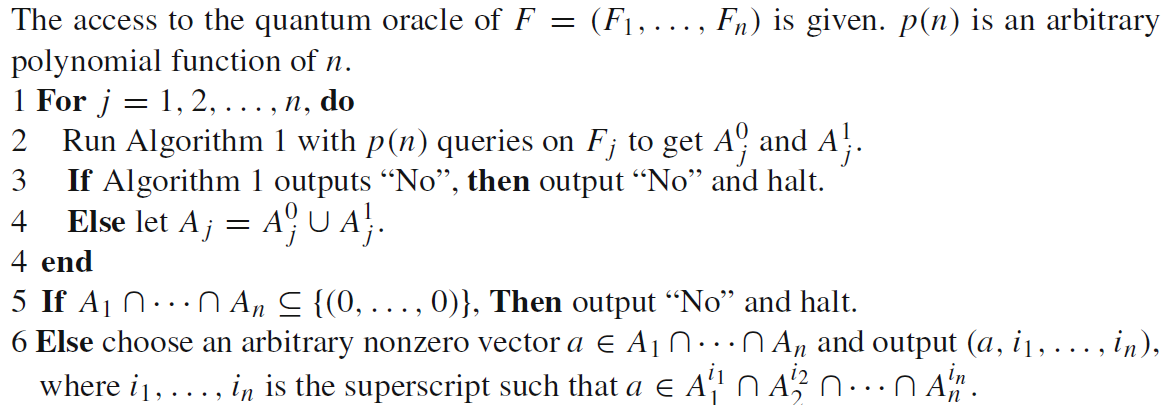

Hay que tener en cuenta que el Algoritmo en realidad requiere que el adversario tenga acceso de oráculo a
cada función componente de F. Acerca de la eficiencia, dado que el Algoritmo necesita encontrar la
intersección de los conjuntos Aj, su complejidad depende del tamaño de estos conjuntos, que se basa en
las propiedades de la función específica F. Sin embargo, podemos probar que solo se necesita un tiempo
de cálculo polinomial cuando se aplica el Algoritmo al esquema de Feistel de 3 rondas o la construcción
de Even-Mansour. El algoritmo de Simon se usa para encontrar el período de
algunas funciones construidas y luego rompen la seguridad del esquema de Feistel de 3 rondas o la
construcción de Even-Mansour. Comparado con el algoritmo de Simon, la complejidad del Algoritmo es
un poco mayor porque necesita buscar estructuras lineales de cada función componente respectivamente.
Sin embargo, el Algoritmo tiene aplicaciones más generales. Puede encontrar no solo los períodos de
una función, sino también sus otras estructuras lineales, lo que permite construir múltiples distintivos
para el esquema de Feistel de 3 rondas.

## Aplicación a un esquema Feistel de tres rondas

Un esquema de Feistel es una construcción clásica para construir cifrados de bloque. Un esquema Feistel
de 3 rondas con entrada (xL , xR) y salida (yL , yR) se construye a partir de tres funciones aleatorias P1,
P2, P3 como se muestra en la figura, donde xL , xR, yL , yR ÿ {0, 1}n. Se ha demostrado que un esquema
Feistel de 3 rondas es una permutación pseudoaleatoria segura siempre que las funciones internas
también sean pseudoaleatorias.

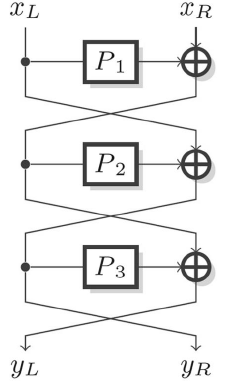

Ejecutando el Algoritmo en F se puede obtener (1 s). En el otro
Por otro lado, la probabilidad de que una función aleatoria tenga una estructura lineal es despreciable. Dado que
acceso a un oráculo cuántico que calcula la función E de Feistel de 3 rondas o una función aleatoria
permutación sobre {0, 1}^2n, se puede construir el algoritmo distintivo de la siguiente manera
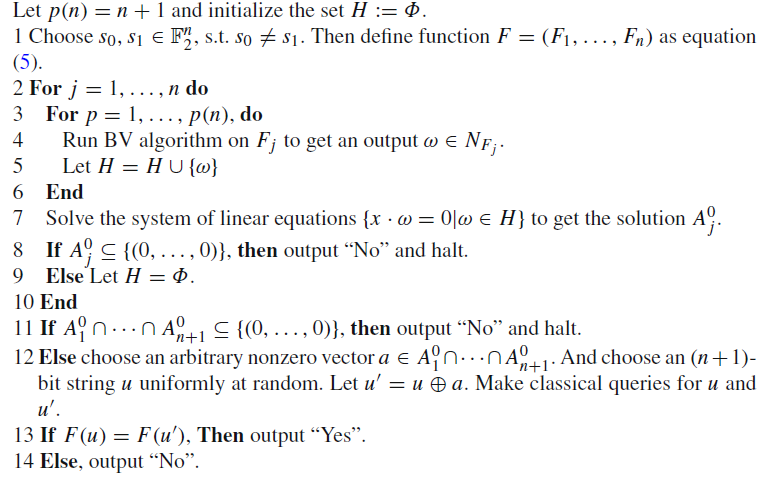 

Hay que tener en cuenta que el Algoritmo en realidad requiere que el atacante pueda consultar la función de
cada componente de la parte derecha de E

## Aplicación a la construcción de Even-Mansour

La construcción de Even-Mansour es un esquema simple que construye un cifrado de bloque a partir de una
permutación pública. Supongamos que ``` P : {0, 1}^n ÿ {0, 1}^n ``` es una permutación, la función de cifrado se define
como
$$ E_{k1, k2} = P(x \otimes k_1) ⊗ k_2 $$

donde ``` k1 ```, ``` k2 ``` son las claves. Even y Mansour han demostrado que esta construcción es segura en el modelo de
permutación aleatoria hasta ``` 2^(n/2) ``` consultas. Sin embargo, Kuwakado y Morii propusieron un ataque cuántico que
podría recuperar la clave ``` k1 ``` según el algoritmo de Simon. Nuestra estrategia de ataque es similar a la de ellos,
usamos el algoritmo BV en lugar del algoritmo de Simon.

Para recuperar la clave k1, primero definimos la siguiente función:
$$ F : \{0,1\}^n → \{0,1\}^n $$
$$ x → E_{k1,k2} (x) ⊗ p(x) $$

Dado el acceso al oráculo de ``` Ek1k2 ```, es fácil construir el oráculo ``` OF ``` que calcula F sobre superposiciones. Dado que ``` F(x) ⊕ F(x ⊕ k1) = 0 ``` para todo ``` x ∈ Fn2 ```, ``` k1 ``` es una estructura lineal de F, o más exactamente, ``` k1 ∈ U(00...0) ``` . Por lo tanto, ejecutando el algoritmo en ``` F ``` con pequeñas modificaciones podemos obtener ``` k1 ```. En concreto, el siguiente algoritmo puede recuperar ``` k1 ``` con una probabilidad abrumadora.

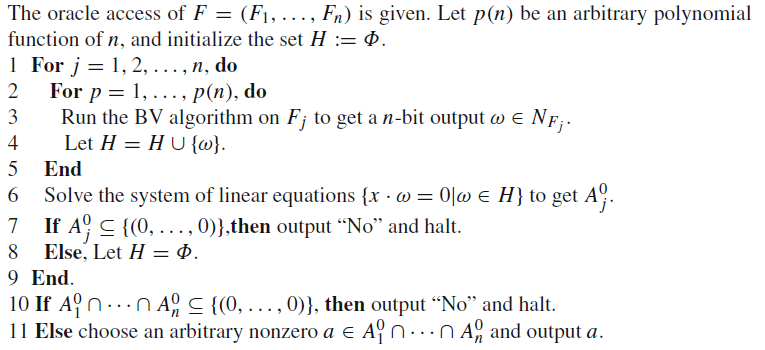



